# Create Potential Fast Transient List

Author: Melissa Graham & Midori Rollins

Identify potential fast transients from the "good" candidates created for all of the DDF.

To do this, we constrain the time spans, peak magnitudes, and amplitudes

**Short-duration transient phenomena**:

 * Short timespan (2 to 20 days) in every filter.
 * Reaches a peak of at least 22 mag in any filter.
 * Has an amplitude of at least 0.5 mag in any filter.

Write the list of potential SNIa to `potential_fast_transients_list.txt`.

Save the plot of every potential SNIa lightcurve in the folder `all_potential_fast_transients_plots/`.

## Set up and read in data

In [23]:
import os
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# import pandas as pd

# from copy import deepcopy
import time

In [24]:
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']

all_filters = ['g','r','i']
all_fcolors = ['green','red','blue']
all_fshapes = ['o','s','^']
all_fsizes  = [5, 5, 7]

In [25]:
all_filters = ['g', 'r', 'i']
clr = ['darkgreen', 'firebrick', 'saddlebrown', 'limegreen', 'orange', 'lightcoral']
sym = ['o', 's', '^', 'o', 's', '^']
siz = [5, 5, 7, 5, 5, 7]

In [26]:
fnm = '../all_nightly_epochs_files/candidate_lightcurves.dat'

candLC_field = np.loadtxt(fnm, dtype='str', usecols=(0))
candLC_candid = np.loadtxt(fnm, dtype='str', usecols=(1))
candLC_caldate = np.loadtxt(fnm, dtype='str', usecols=(2))
candLC_mjd = np.loadtxt(fnm, dtype='float', usecols=(3))
candLC_filter = np.loadtxt(fnm, dtype='str', usecols=(4))
candLC_Nobj = np.loadtxt(fnm, dtype='int', usecols=(5))
candLC_mag = np.loadtxt(fnm, dtype='float', usecols=(6))
candLC_mage = np.loadtxt(fnm, dtype='float', usecols=(7))
candLC_mrb = np.loadtxt(fnm, dtype='float', usecols=(8))
candLC_lef = np.loadtxt(fnm, dtype='float', usecols=(9))

del fnm

In [27]:
fnm = '../all_nightly_epochs_files/candidate_lightcurve_parameters.dat'

paramLC_field = np.loadtxt( fnm, dtype='str', usecols=(0) )
paramLC_candid = np.loadtxt( fnm, dtype='str', usecols=(1) )
paramLC_tspan = np.loadtxt( fnm, dtype='float', usecols=(2) )
paramLC_tspan_g = np.loadtxt( fnm, dtype='float', usecols=(3) )
paramLC_tspan_r = np.loadtxt( fnm, dtype='float', usecols=(4) )
paramLC_tspan_i = np.loadtxt( fnm, dtype='float', usecols=(5) )
paramLC_minmag = np.loadtxt( fnm, dtype='float', usecols=(6) )
paramLC_minmag_g = np.loadtxt( fnm, dtype='float', usecols=(7) )
paramLC_minmag_r = np.loadtxt( fnm, dtype='float', usecols=(8) )
paramLC_minmag_i = np.loadtxt( fnm, dtype='float', usecols=(9) )
paramLC_amp = np.loadtxt( fnm, dtype='float', usecols=(10) )
paramLC_amp_g = np.loadtxt( fnm, dtype='float', usecols=(11) )
paramLC_amp_r = np.loadtxt( fnm, dtype='float', usecols=(12) )
paramLC_amp_i = np.loadtxt( fnm, dtype='float', usecols=(13) )
paramLC_neps = np.loadtxt( fnm, dtype='int', usecols=(14) )
paramLC_neps_g = np.loadtxt( fnm, dtype='int', usecols=(15) )
paramLC_neps_r = np.loadtxt( fnm, dtype='int', usecols=(16) )
paramLC_neps_i = np.loadtxt( fnm, dtype='int', usecols=(17) )

del fnm

## Identify potential fast transients

We end up using just a single line in the amplitude _vs._ time span plane. It's the dashed line in the plots below.

> **NOTE** - **2023-03-07** - the conditions have been RELAXED to allow for a larger number of potential SNIa

Number of potential fast transients in COSMOS:  11
Number of potential fast transients in ELAIS:  9


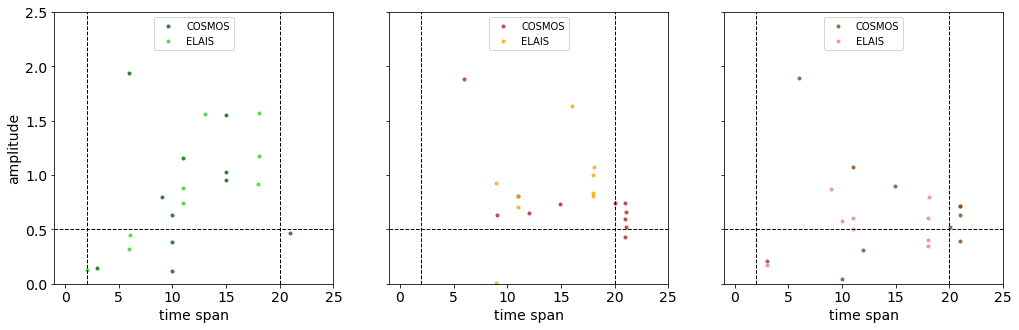

In [28]:
fig, ax = plt.subplots( 1, 3, figsize=(17,5), sharex=True, sharey=True )

### plot all the candidates in parameter space of timespan vs amplitude
tx = np.where((((paramLC_field == 'COSMOS') & (paramLC_tspan_g >= 2) & (paramLC_tspan_g <= 22)) & 
               ((paramLC_tspan_r >= 2) & (paramLC_tspan_r <= 22)) & 
               ((paramLC_tspan_i >= 2) & (paramLC_tspan_i <= 22))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
print('Number of potential fast transients in COSMOS: ',len(tx))
ax[0].plot(paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[0], label='COSMOS')
ax[1].plot(paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[1], label='COSMOS')
ax[2].plot(paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[2], label='COSMOS')
del tx
tx = np.where((((paramLC_field == 'ELAIS') & (paramLC_tspan_g >= 2) & (paramLC_tspan_g <= 22)) & 
               ((paramLC_tspan_r >= 2) & (paramLC_tspan_r <= 22)) & 
               ((paramLC_tspan_i >= 2) & (paramLC_tspan_i <= 22))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
print('Number of potential fast transients in ELAIS: ',len(tx))
ax[0].plot(paramLC_tspan_g[tx], paramLC_amp_g[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[3], label='ELAIS')
ax[1].plot(paramLC_tspan_r[tx], paramLC_amp_r[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[4], label='ELAIS')
ax[2].plot(paramLC_tspan_i[tx], paramLC_amp_i[tx], 'o', ms=4, mew=0, alpha=0.8, color=clr[5], label='ELAIS')
del tx

for f in range(3):
    ax[f].axvline(2, lw=1, ls='dashed', color='black')
    ax[f].axvline(20, lw=1, ls='dashed', color='black')
    ax[f].axhline(0.5, lw=1, ls='dashed', color='black')
    
paramLC_potft = np.zeros( len(paramLC_field), dtype='int' )

# paramLC_potft = (paramLC_candid[x])

### finish up the plot and show it
ax[0].set_xlim([-1,25])
ax[1].set_xlim([-1,25])
ax[2].set_xlim([-1,25])
ax[0].set_ylim([0.,2.5])
ax[1].set_ylim([0.,2.5])
ax[2].set_ylim([0.,2.5])
ax[0].set_ylabel('amplitude')
# ax[1,0].set_ylabel('amplitude')
ax[0].set_xlabel('time span')
ax[1].set_xlabel('time span')
ax[2].set_xlabel('time span')
ax[0].legend(loc='best',fontsize=10)
ax[1].legend(loc='best',fontsize=10)
ax[2].legend(loc='best',fontsize=10)
plt.show()

### Write the list of potential fast transients to file

In [29]:
fout = open('potential_fast_transients_list.dat', 'w')
tx = np.where((((paramLC_tspan_g >= 2) & (paramLC_tspan_g <= 22)) & 
               ((paramLC_tspan_r >= 2) & (paramLC_tspan_r <= 22)) & 
               ((paramLC_tspan_i >= 2) & (paramLC_tspan_i <= 22))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
for x in range(len(tx)):
    fout.write(paramLC_candid[tx[x]]+'\n')
fout.close()
print('Number of potential fast transients: ', len(tx))
del tx

Number of potential fast transients:  20


### Plot the potential fast transient lightcurves

Display the time span and the amplitude in the upper left corner.

Some appear to be "short duration" just by being partial lightcurves,
but at least DC22icaog seems to have a rise and fall, just over two weeks.

Total number which met criteria:  20


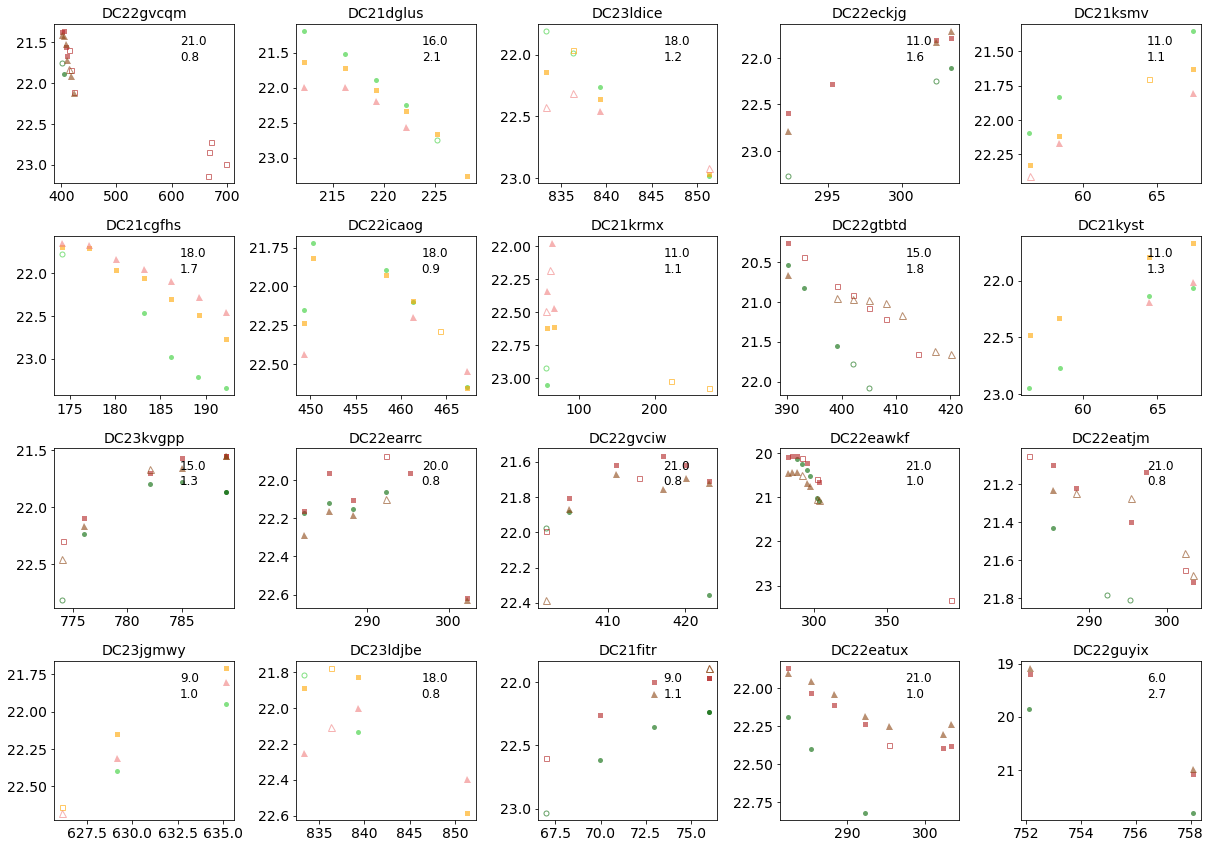

In [53]:
sx = np.where((((paramLC_tspan_g >= 2) & (paramLC_tspan_g <= 22)) & 
               ((paramLC_tspan_r >= 2) & (paramLC_tspan_r <= 22)) & 
               ((paramLC_tspan_i >= 2) & (paramLC_tspan_i <= 22))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]
print('Total number which met criteria: ', len(sx))
np.random.shuffle(sx)

fig, ax = plt.subplots( 4, 5, figsize=(17, 12), sharex=False, sharey=False )

s = 0
for i in range(4):
    for j in range(5):
        for f,filt in enumerate(all_filters):
            clr_i = f
            if paramLC_field[sx[s]] == 'ELAIS':
                clr_i = f+3
            cx0 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
            cx1 = np.where((candLC_candid == paramLC_candid[sx[s]]) & \
                           (candLC_filter == filt) & (candLC_mrb <= 0.4))[0]
            ax[i,j].plot( candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                         sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i] )
            ax[i,j].plot( candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                         sym[clr_i], ms=siz[clr_i], mew=1, alpha=0.6, mec=clr[clr_i], color='none' )
            del cx0, cx1
        ax[i,j].invert_yaxis()
        ax[i,j].set_title(paramLC_candid[sx[s]], fontsize=14)
        ax[i,j].text(0.70, 0.85, str(np.round(paramLC_tspan[sx[s]],0)), fontsize=12, color='black', 
                     verticalalignment='bottom', horizontalalignment='left',  transform=ax[i,j].transAxes)
        ax[i,j].text(0.70, 0.75, str(np.round(paramLC_amp[sx[s]],1)), fontsize=12, color='black', 
                     verticalalignment='bottom', horizontalalignment='left',  transform=ax[i,j].transAxes)
        s += 1

plt.tight_layout()
plt.show()
del sx,s

### Save individual plots as PNG files

In [31]:
sx = np.where((((paramLC_tspan_g >= 2) & (paramLC_tspan_g <= 22)) & 
               ((paramLC_tspan_r >= 2) & (paramLC_tspan_r <= 22)) & 
               ((paramLC_tspan_i >= 2) & (paramLC_tspan_i <= 22))) & 
              ((paramLC_minmag_g < 22) | (paramLC_minmag_r < 22) | (paramLC_minmag_i < 22)) &
              ((paramLC_amp_g >= 0.5) | (paramLC_amp_r >= 0.5) | (paramLC_amp_i >= 0.5)))[0]

plt.rcParams.update({'font.size': 14})

for x in range(len(sx)):
    plt.figure(figsize=(8,6))

    for f,filt in enumerate(all_filters):
        clr_i = f
        if paramLC_field[sx[x]] == 'ELAIS':
            clr_i = f+3
        cx0 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb > 0.4))[0]
        cx1 = np.where((candLC_candid == paramLC_candid[sx[x]]) & \
                       (candLC_filter == filt) & (candLC_mrb <= 0.4))[0]
        plt.plot( candLC_mjd[cx0]-59300., candLC_mag[cx0], 
                     sym[clr_i], ms=siz[clr_i], mew=0, alpha=0.6, color=clr[clr_i], label=filt )
        plt.plot( candLC_mjd[cx1]-59300., candLC_mag[cx1], 
                     sym[clr_i], ms=siz[clr_i], mew=1, alpha=0.6, mec=clr[clr_i], color='none', label=filt+' (R/B<0.4)' )
        del cx0, cx1
    plt.gca().invert_yaxis()
    plt.legend(loc='best', labelspacing=0.1, handletextpad=0.1, fontsize=14)
    plt.title(paramLC_candid[sx[x]])
    # plt.text(0.70, 0.85, str(np.round(paramLC_tspan[sx[x]],0)), fontsize=12, color='black', 
    #              verticalalignment='bottom', horizontalalignment='left',  transform=ax.transAxes)
    # plt.text(0.70, 0.75, str(np.round(paramLC_amp[sx[x]],1)), fontsize=12, color='black', 
    #              verticalalignment='bottom', horizontalalignment='left',  transform=ax.transAxes)
    plt.xlabel('MJD-59300', fontsize=14)
    plt.ylabel('mag',fontsize=14)
    plt.savefig('all_potential_fast_transients_plots/'+paramLC_candid[sx[x]]+'.png')
    plt.close()

del sx

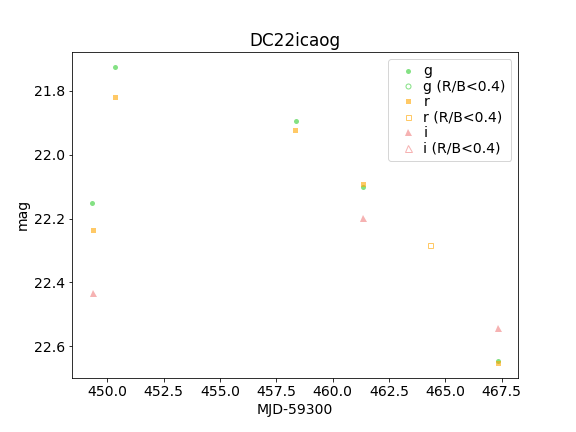

In [10]:
from IPython.display import display, Image
image = Image(filename='../fast_transients/all_potential_fast_transients_plots/DC22icaog.png',width=450)
display(image)

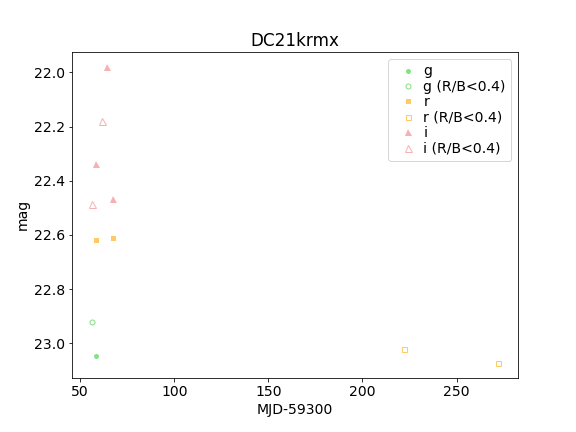

In [43]:
image = Image(filename='../fast_transients/all_potential_fast_transients_plots/DC21krmx.png',width=450)
display(image)

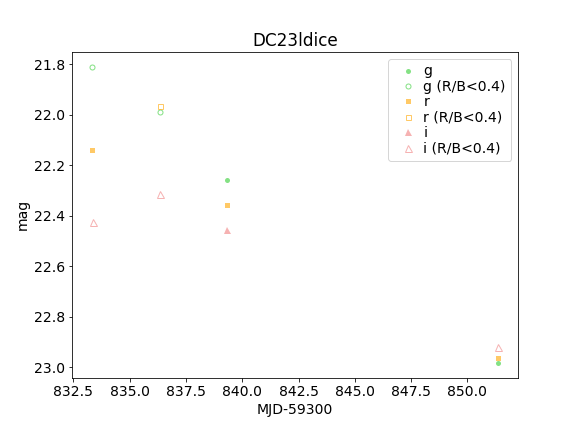

In [50]:
image = Image(filename='../fast_transients/all_potential_fast_transients_plots/DC23ldice.png',width=450)
display(image)

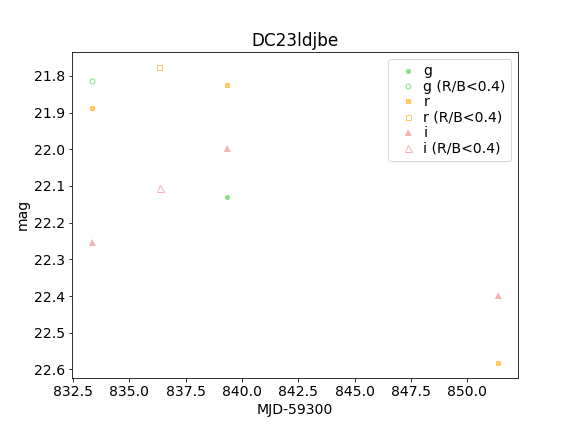

In [51]:
image = Image(filename='../fast_transients/all_potential_fast_transients_plots/DC23ldjbe.png',width=450)
display(image)